# **Import data**

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# **First look**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


Dataframe variables: 
- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute

In [3]:
df = pd.read_csv(r'/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
#looking for missing data 
#msno.matrix(df)

In [6]:
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [7]:
#Replace RiskLevel column values
df['RiskLevel'] = df['RiskLevel'].replace({'low risk':'1', 'mid risk': '2', 'high risk': '3'})
df.head()
#df.RiskLevel.value_counts()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


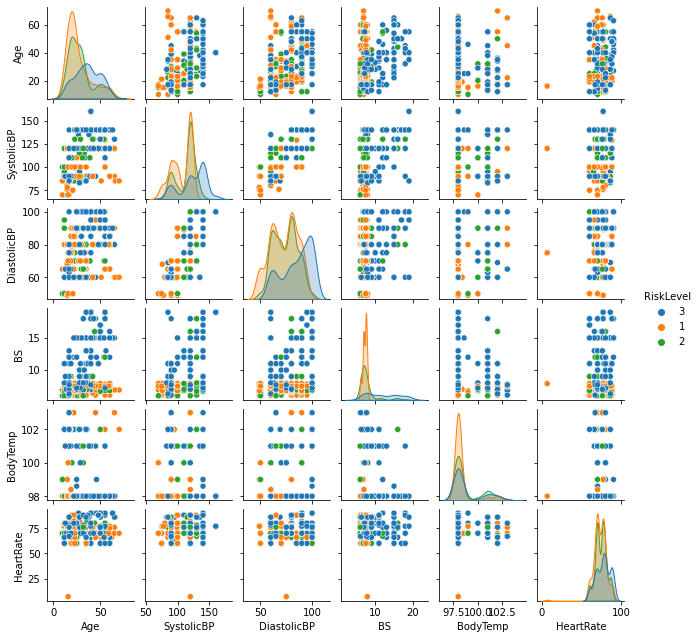

In [8]:
sns.pairplot(df,height=1.5,hue='RiskLevel')

<AxesSubplot:>

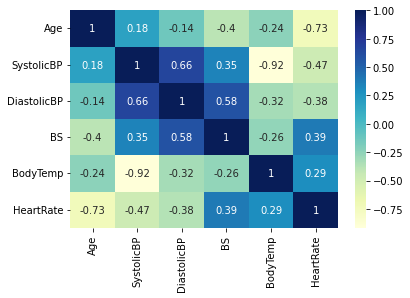

In [9]:
sns.heatmap(df[:5].corr(method ='pearson'),cmap="YlGnBu", annot=True)

# **Data analysis**

## **Age**

In [10]:
#df['Age'].unique()
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].mean()) 
print(df['Age'].median())

10
70
29.871794871794872
26.0


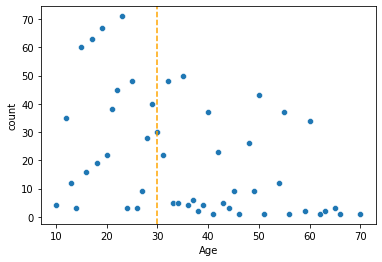

In [11]:
#maternal_health_risk['Age'].value_counts().reset_index()

data = df[['Age']].value_counts().reset_index().sort_values(by='Age')
data.rename(columns={data.columns[1]:'count'}, inplace=True)
sns.scatterplot(x='Age',y='count',data=data)
plt.xticks([10,20,30,40,50,60,70],["10","20","30","40","50","60","70" ])
plt.axvline (29.87, 0,1, color="orange", linestyle="--")
plt.show()

In [12]:
data.sort_values(by='count',ascending=False).head()

,Age,count
0,23,71
1,19,67
2,17,63
3,15,60
4,35,50


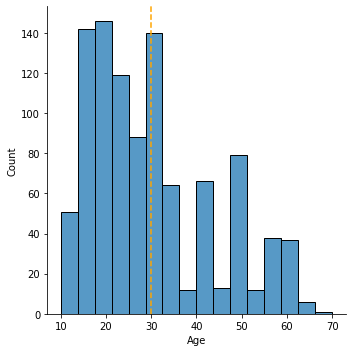

In [13]:
plot = sns.displot(data=df, x= "Age", kind="hist", kde=False)
plt.xticks([10,20,30,40,50,60,70],["10","20","30","40","50","60","70"])
plt.axvline (29.87, 0,1, color="orange", linestyle="--")
plt.show()

In [14]:
#Use the age categories life cylce group by canada statistics department
sections = [(df['Age'] <= 14 ),\
           (df['Age'] >= 15) & (df['Age'] <=24),\
           (df['Age'] >= 25) & (df['Age'] <=64),\
           (df['Age'] > 64)]

choice =['children','youth','adult','senior']
df['group'] = np.select(sections, choice)

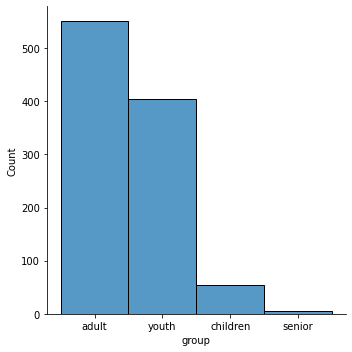

In [15]:
data = df[['group']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'count'}, inplace=True)
plot = sns.displot(data=df, x= "group", kind="hist", kde=False)
plt.show()

## **Age conlcusion**
- The mean of the df is 29.87 year old
- The median of the df is 26 years old
- Range of the dataframe 10 to 70 years old 
- By Age, almost all of the top 5 ages are below 30 years old, being  23,19,17,15 and 35
- If we group by age categories life cylce group by canada statistics department it looks like most of the dataframe are adults, meaning that even if most of the births are from youth people, the range of the adult lifespan makes them greater in quantity

## **SystolicBS and DiastolicBP**

In [16]:
data = df[['SystolicBP','DiastolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'count'}, inplace=True)
data.head()

,SystolicBP,DiastolicBP,count
0,120,80,204
1,120,90,112
2,90,60,67
3,140,100,63
4,90,65,53


113.19822485207101
120.0


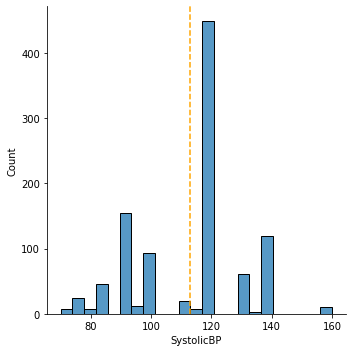

In [17]:
print(df['SystolicBP'].mean())
print(df['SystolicBP'].median())
plot = sns.displot(data=df, x= "SystolicBP", kind="hist", kde=False)
#plt.xticks([10,20,30,40,50,60,70],["10","20","30","40","50","60","70"])
plt.axvline (113, 0,1, color="orange", linestyle="--")
plt.show()

76.46055226824457
80.0


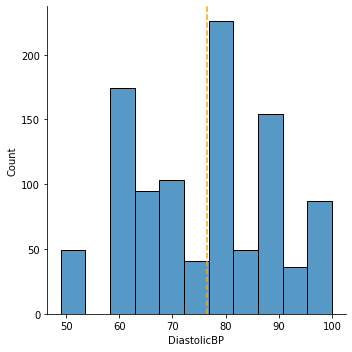

In [18]:
print(df['DiastolicBP'].mean())
print(df['DiastolicBP'].median())
plot = sns.displot(data=df, x= "DiastolicBP", kind="hist", kde=False)
#plt.xticks([10,20,30,40,50,60,70],["10","20","30","40","50","60","70"])
plt.axvline (76.46, 0,1, color="orange", linestyle="--")
plt.show()

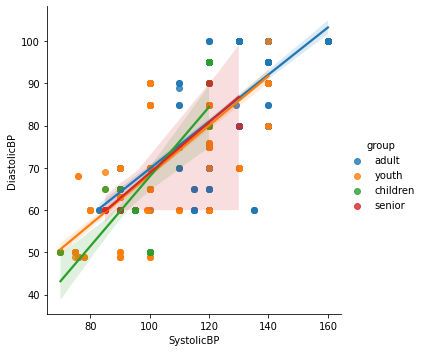

In [19]:
sns.lmplot(x='SystolicBP',y='DiastolicBP',data=df,hue='group')

In [20]:
#Mayo clinic categories for Systolic Blood Pressure 
sections = [(df['SystolicBP'] < 120 ) & (df['DiastolicBP'] <80),\
           (df['SystolicBP'] >= 120) & (df['SystolicBP'] <=129) & (df['DiastolicBP'] < 80),\
           (df['SystolicBP'] >= 130) & (df['SystolicBP'] <=139) | (df['DiastolicBP'] >= 80) & (df['DiastolicBP'] <=89),\
           (df['SystolicBP'] >=140) | (df['DiastolicBP'] >= 90)]
choice =['normal','elevated','stage 1','stage 2']
df['type'] = np.select(sections,choice)

normal      0.338264
stage 1     0.323471
stage 2     0.261341
elevated    0.076923
Name: type, dtype: float64


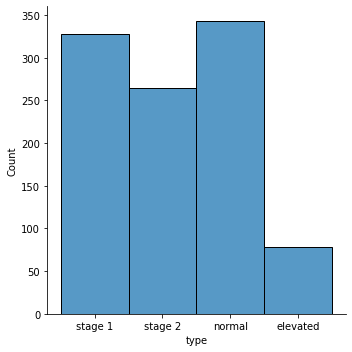

In [21]:
print(df.type.value_counts(normalize=True))
plot = sns.displot(data=df, x= "type", kind="hist", kde=False)
plt.show()

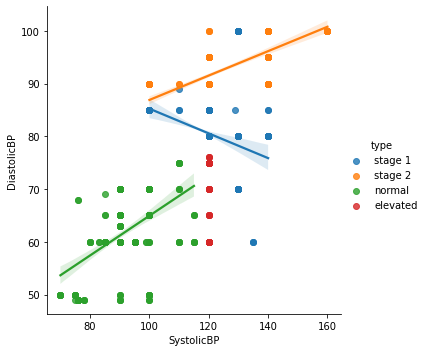

In [22]:
sns.lmplot(x='SystolicBP',y='DiastolicBP',data=df,hue='type')

## **Blood glucose levels**

In [23]:
print(df[['BS']].mean())
print(df[['BS']].median())

BS    8.725986
dtype: float64
BS    7.5
dtype: float64


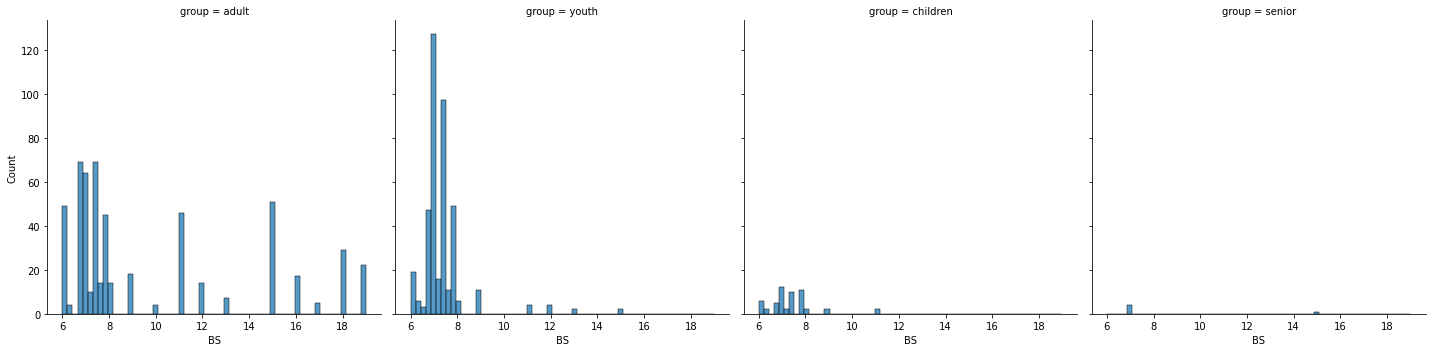

In [24]:
plot = sns.displot(data=df, x= "BS", kind="hist", kde=False,col='group')
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
plt.show()

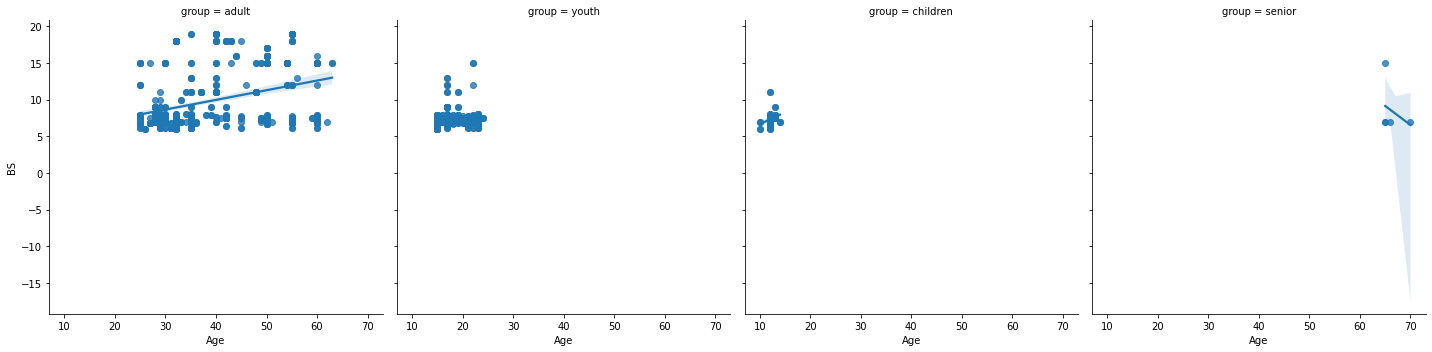

In [25]:
sns.lmplot(x='Age',y='BS',data=df,col='group')

## **Body temperature**

In [26]:
#plot = sns.displot(data=df, x= "BodyTemp", kind="hist", kde=False)
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
#plt.show()

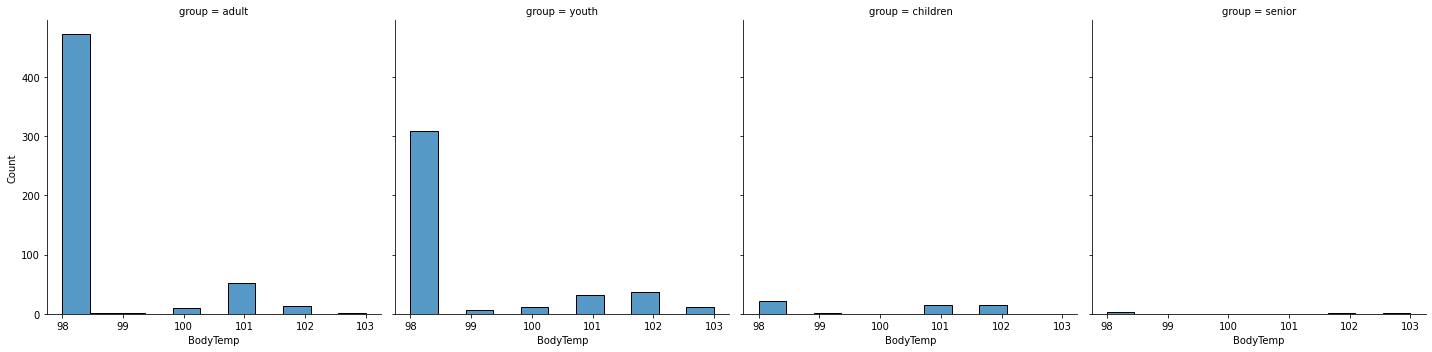

In [27]:
plot = sns.displot(data=df, x= "BodyTemp", kind="hist", kde=False, col='group')
#plt.xticks([10,20],["10","20"])
#plt.axvline (98.6, 0,1, color="orange", linestyle="--")
plt.show()

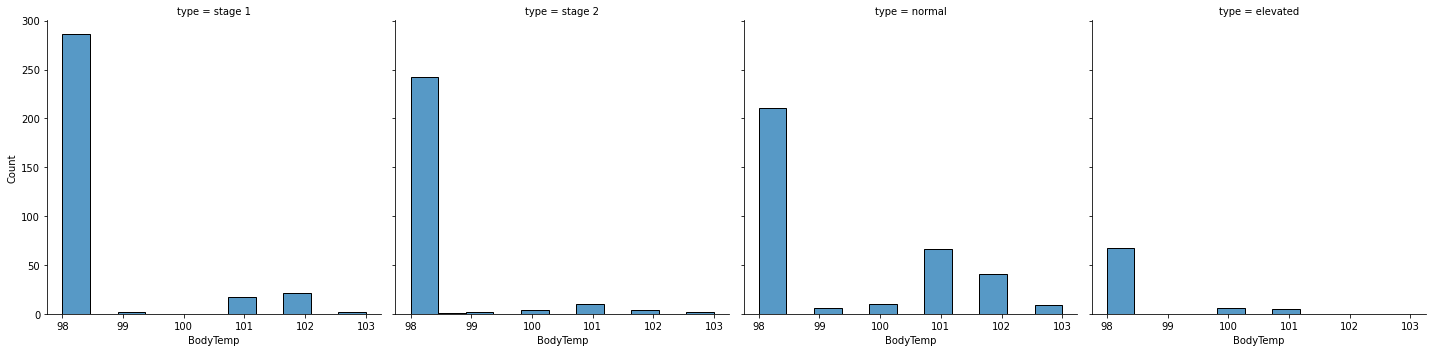

In [28]:
plot = sns.displot(data=df, x= "BodyTemp", kind="hist", kde=False, col='type')
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
plt.show()

## **Heart rate**

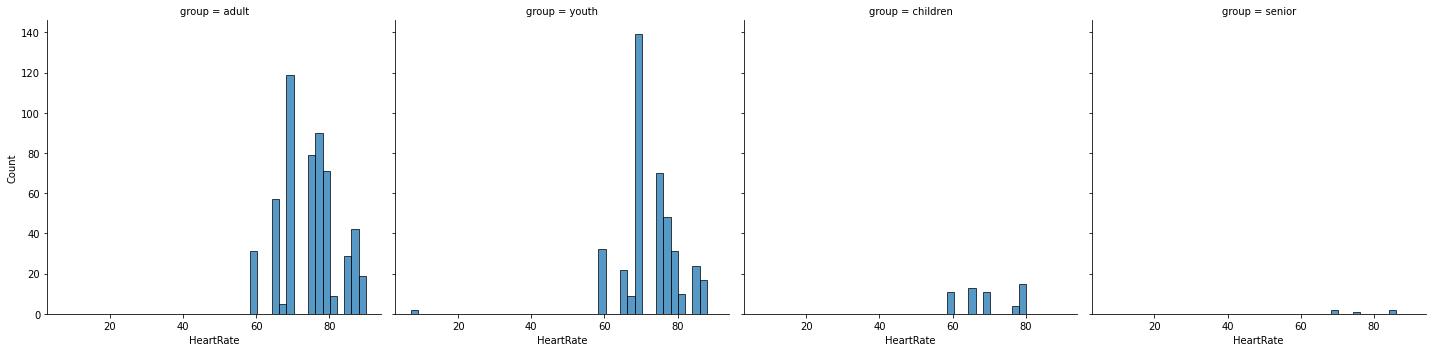

In [29]:
plot = sns.displot(data=df, x= "HeartRate", kind="hist", kde=False, col='group')
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
plt.show()

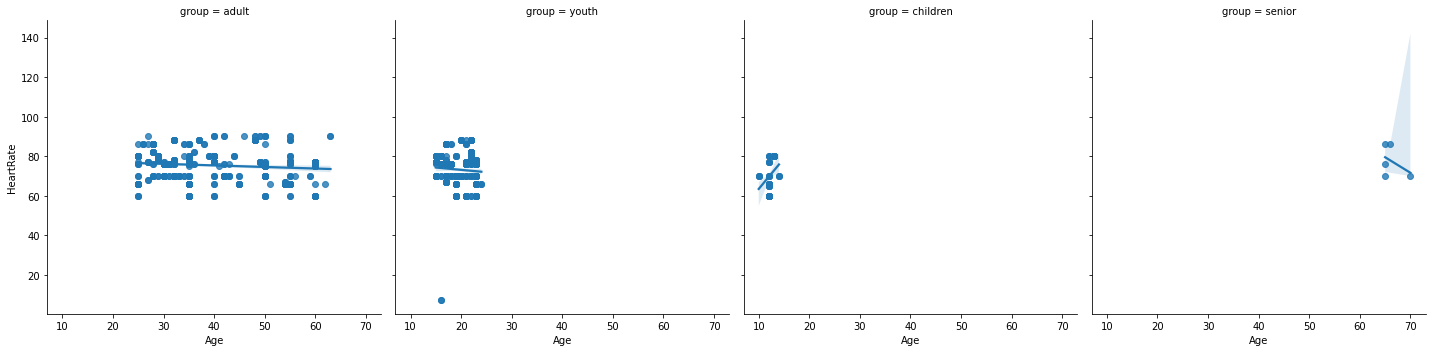

In [30]:
sns.lmplot(x='Age',y='HeartRate',data=df,col='group')

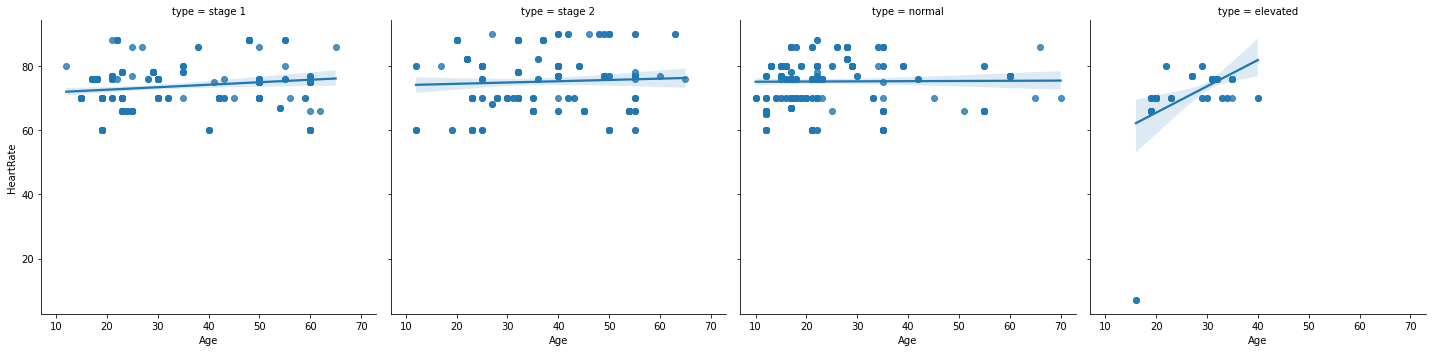

In [31]:
sns.lmplot(x='Age',y='HeartRate',data=df,col='type')

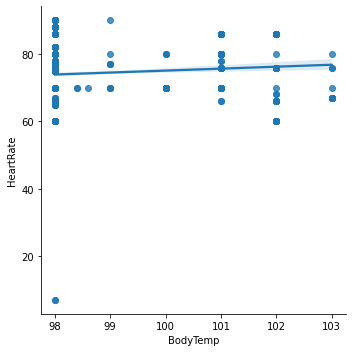

In [32]:
sns.lmplot(x='BodyTemp',y='HeartRate',data=df)

## **Risk level**

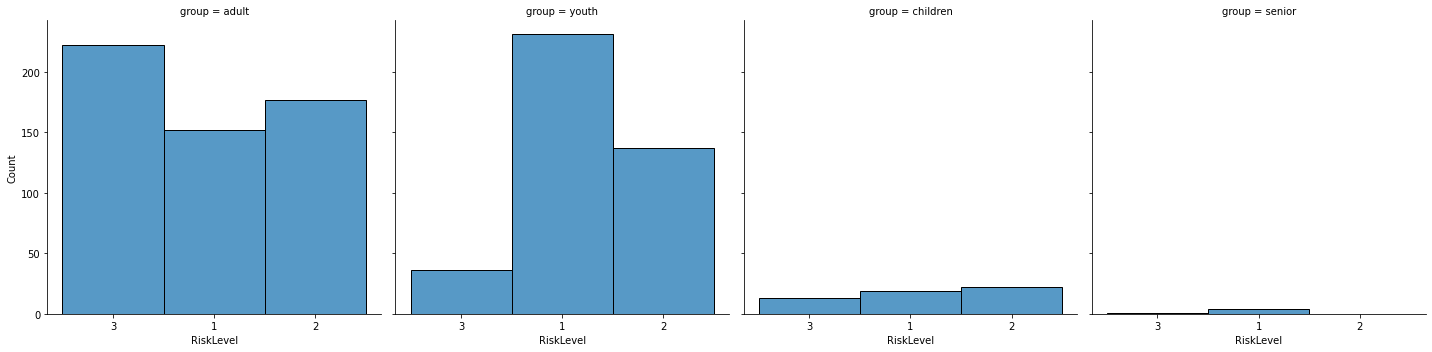

In [33]:
plot = sns.displot(data=df, x= "RiskLevel", kind="hist", kde=False, col='group')
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
plt.show()

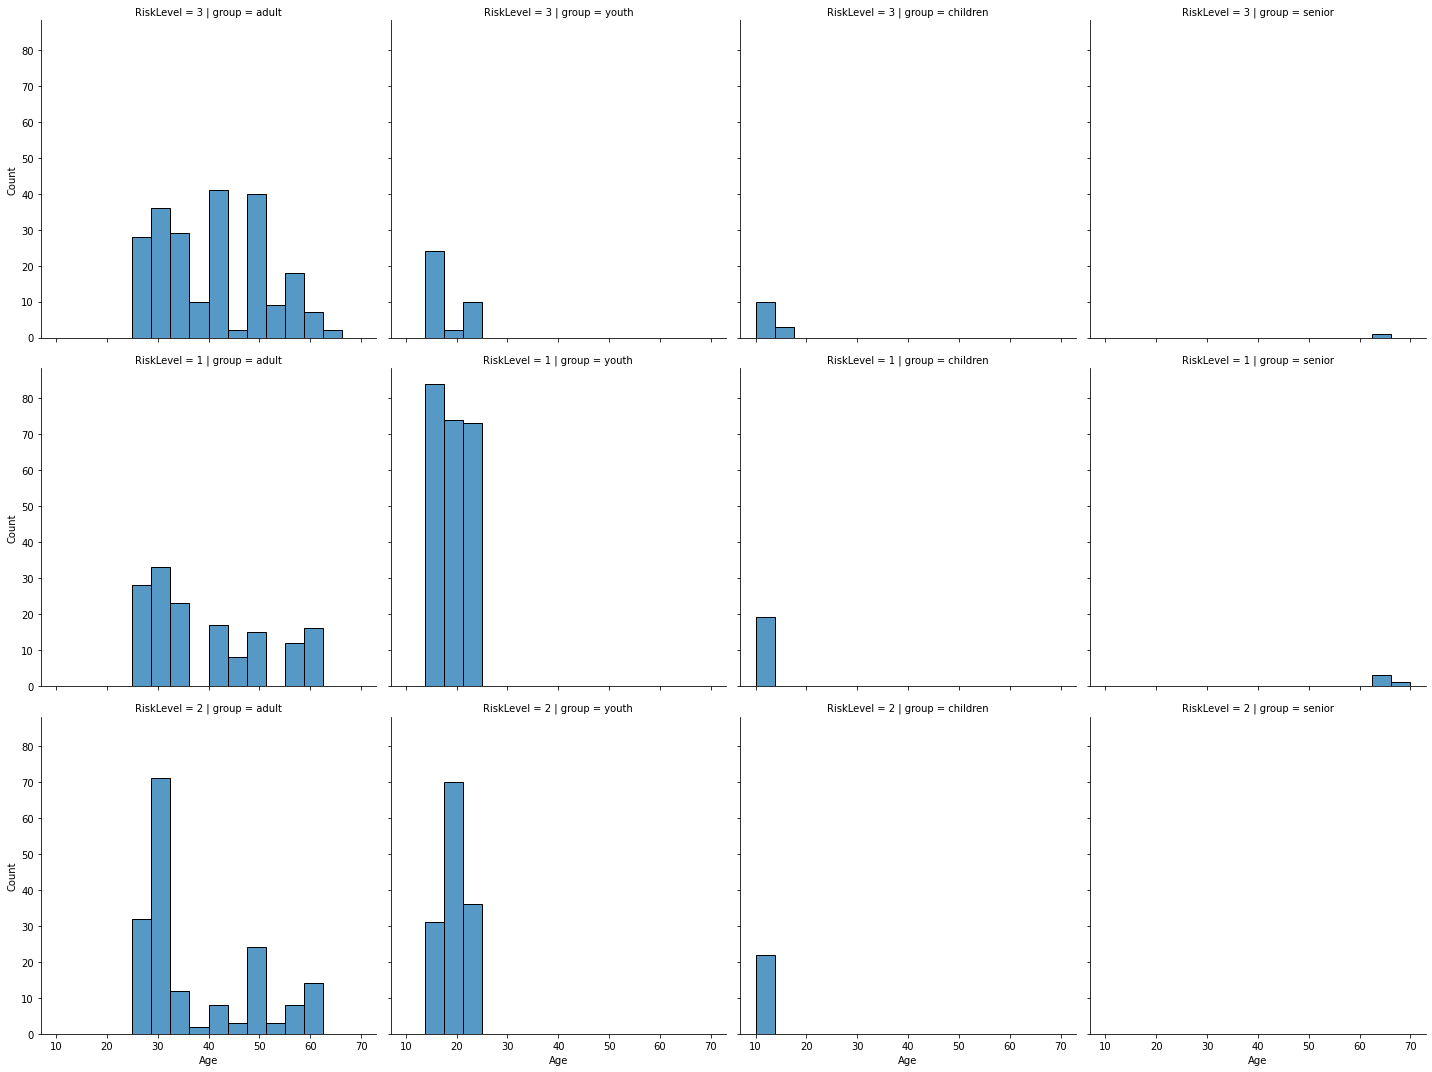

In [34]:
plot = sns.displot(data=df, x= "Age", kind="hist", kde=False, row='RiskLevel',col='group')
#plt.xticks([10,20],["10","20"])
#plt.axvline (7.5, 0,1, color="orange", linestyle="--")
plt.show()

# **Machine Learning Analysis**

In [35]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'group', 'type'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [37]:
X = df.drop(['RiskLevel','group','type'], axis=1)
y = df.RiskLevel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((811, 6), (203, 6))

In [38]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [39]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [40]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.SGDClassifier(),
    linear_model.LogisticRegression(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    XGBClassifier(eval_metric="mlogloss"),
    CatBoostClassifier(silent=True)  
]

In [41]:
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)

MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

GradientBoostingClassifier Done
RandomForestClassifier Done
SGDClassifier Done
LogisticRegression Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier Done
CatBoostClassifier Done


,MLA Name,Accuracy Score,K-Fold Accuracy
0,XGBClassifier,82.758621,83.102981
1,CatBoostClassifier,81.280788,83.104487
2,DecisionTreeClassifier,80.295567,81.129178
3,RandomForestClassifier,78.325123,84.214092
4,GradientBoostingClassifier,77.339901,79.644685
5,ExtraTreeClassifier,76.354680,82.118338
6,LogisticRegression,68.472906,59.915688
7,SGDClassifier,59.605911,57.704005
